
テストデータの'PassengerId',　'Pclass', 'Sex', 'Age', 'Fare'の列を利用

訓練データは用いない　　

AgeとFareの欠損値は平均で埋める　　

Sexはfemaleを0、maleを1に変換　　

K-meansを使用


In [2]:
import pandas as pd

# Read the data
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train = train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [9]:
train.loc[train['Age'].isnull(), 'Age'] = train['Age'].mean()
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

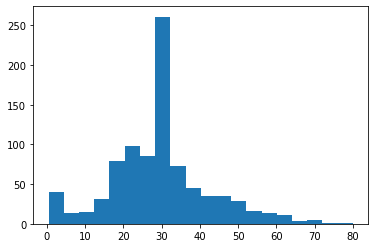

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(train['Age'], bins=20)

In [19]:
train["Sex"] = train["Sex"].replace(["female", "male"], [0, 1])
train.head()



,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,1,22.0,7.2500
1,2,1,1,0,38.0,71.2833
2,3,1,3,0,26.0,7.9250
3,4,1,1,0,35.0,53.1000
4,5,0,3,1,35.0,8.0500


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_sc = sc.fit_transform(train)

kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(train_sc)
train["cluster"] = clusters.labels_

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,cluster
0,1,0,3,1,22.0,7.2500,0
1,2,1,1,0,38.0,71.2833,1
2,3,1,3,0,26.0,7.9250,1
3,4,1,1,0,35.0,53.1000,1
4,5,0,3,1,35.0,8.0500,0


In [21]:
train.groupby("cluster").mean()

,PassengerId,Survived,Pclass,Sex,Age,Fare
cluster,,,,,,
0,448.766610,0.080068,2.592845,0.867121,29.882800,18.924750
1,440.657895,0.970395,1.759868,0.223684,29.344442,57.845793


In [36]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
test.loc[test['Age'].isnull(), 'Age'] = test['Age'].mean()
test.loc[test['Fare'].isnull(), 'Fare'] = test['Fare'].mean()
test = test[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare']]
test["Sex"] = test["Sex"].replace(["female", "male"], [0, 1])



In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
test_sc = sc.fit_transform(test)

kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(test_sc)
test["cluster"] = clusters.labels_
test['Survived'] = test['cluster']

test.head()

,PassengerId,Pclass,Sex,Age,Fare,cluster,Survived
0,892,3,1,34.5,7.8292,0,0
1,893,3,0,47.0,7.0000,0,0
2,894,2,1,62.0,9.6875,1,1
3,895,3,1,27.0,8.6625,0,0
4,896,3,0,22.0,12.2875,0,0


In [58]:
test.groupby('Pclass')['Survived'].mean()

Pclass
1    1.000000
2    0.107527
3    0.000000
Name: Survived, dtype: float64

In [64]:
pred = test[['PassengerId', 'Survived']]
pred.to_csv('pred.csv', index=False)
pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [65]:
print(len(pred))

418


In [3]:
gender = pd.read_csv('gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
